<a href="https://www.kaggle.com/code/anshtanwar/resnet-densenet-efficientnet-pet-s-expression?scriptVersionId=139770268" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align:center">
    <img src="https://th.bing.com/th/id/R.da6efed02c859d22b4c6ff31203f2a17?rik=Z9%2bSp6jLAp0lpw&riu=http%3a%2f%2fbestanimations.com%2fAnimals%2fMammals%2fDogs%2fdogs%2fcute-funny-dog-animated-gif-35.gif&ehk=SMyBaiB%2bBR%2bX1ApJ0lXafxgG%2f2gNA11f7KM4VQ877vE%3d&risl=&pid=ImgRaw&r=0" alt="image_description">
</div>


<div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:140%; text-align:center">If you find this helpful, a vote is appreciated ❤️</div>

<div style="border-radius: 10px; border: #E57C23; : padding: 15px; background-color: #FFFAF0; font-size: 120%; text-align: left;">
    <p style="font-weight: bold; margin-bottom: 10px;">Content:</p>
    <ol style="list-style-type: decimal; padding-left: 20px;">
        <li><a href="#Importing-The-Modules" style="color: #E75480; text-decoration: none;">📩 Importing The Modules</a></li>
        <li><a href="#Data-Augmentation-and-Preprocessing" style="color: #E75480; text-decoration: none;">📅 Data Loading, Augmentation and Preprocessing</a></li>
        <li><a href="#Training-and-Evaluation" style="color: #E75480; text-decoration: none;">🧠 Training and Evaluation</a></li>
        <li><a href="#Learning-and-Accuracy-Curve" style="color: #E75480; text-decoration: none;">📉 Learning and Accuracy Curve</a></li>
    </ol>
</div>


In [1]:
!python -m pip install tensorflow tensorflow-addons


# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Importing The Modules</div>

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from IPython.display import display, Image
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Data Preprocessing</div>

In [3]:
# Define the path to the dataset folders
happy_folder = "/kaggle/input/pets-facial-expression-dataset/happy"
sad_folder = "/kaggle/input/pets-facial-expression-dataset/Sad"
angry_folder = "/kaggle/input/pets-facial-expression-dataset/Angry"

# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (48, 48))  # Resize to a fixed size for the model
            images.append(img)
    return images


happy_images = load_images_from_folder(happy_folder)
sad_images = load_images_from_folder(sad_folder)
angry_images = load_images_from_folder(angry_folder)


happy_labels = [0] * len(happy_images)
sad_labels = [1] * len(sad_images)
angry_labels = [2] * len(angry_images)


X = np.array(happy_images + sad_images + angry_images)
y = np.array(happy_labels + sad_labels + angry_labels)
X = X.astype('float32') / 255.0

# One-hot encode the labels
y = to_categorical(y, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
input_shape_resnet = (224, 224, 3)
input_shape_densenet = (224, 224, 3)
input_shape_efficientnet = (224, 224, 3)

def resize_images(images, input_shape):
    resized_images = []
    for img in images:
        img_resized = cv2.resize(img, (input_shape[0], input_shape[1]))
        img_resized = np.expand_dims(img_resized, axis=-1)
        img_resized = np.repeat(img_resized, 3, axis=-1)  # Add three channels to convert grayscale to RGB
        resized_images.append(img_resized)
    return np.array(resized_images)

X_train_resized_resnet = resize_images(X_train, input_shape_resnet)
X_train_resized_densenet = resize_images(X_train, input_shape_densenet)
X_train_resized_efficientnet = resize_images(X_train, input_shape_efficientnet)


# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Training and Evaluation</div>

<div style="background-color:#ffb7cc; padding: 20px;">For ResNet, DenseNet, and EfficientNet, we first load their pre-trained versions from the Keras library with weights trained on ImageNet. We remove their top classification layer, which was originally designed for ImageNet's 1000 classes, and add our custom classification head tailored for our task with three output classes (happy, sad, and angry). This new classification head is appended to the base models' output using global average pooling to extract meaningful features from the images.After adding the custom classification head, we compile each model using categorical cross-entropy as the loss function and the Adam optimizer</div>

In [5]:
# Load pre-trained ResNet50 model and remove the top classification layer
resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape_resnet)
resnet_base_model.trainable = False

# Add custom classification head to the ResNet model
resnet_global_avg_pooling = GlobalAveragePooling2D()(resnet_base_model.output)
resnet_output = Dense(3, activation='softmax')(resnet_global_avg_pooling)
resnet_model = Model(inputs=resnet_base_model.input, outputs=resnet_output)

# Compile the ResNet model
resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


densenet_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape_densenet)
densenet_base_model.trainable = False


densenet_global_avg_pooling = GlobalAveragePooling2D()(densenet_base_model.output)
densenet_output = Dense(3, activation='softmax')(densenet_global_avg_pooling)
densenet_model = Model(inputs=densenet_base_model.input, outputs=densenet_output)


densenet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


efficientnet_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape_efficientnet)
efficientnet_base_model.trainable = False


efficientnet_global_avg_pooling = GlobalAveragePooling2D()(efficientnet_base_model.output)
efficientnet_output = Dense(3, activation='softmax')(efficientnet_global_avg_pooling)
efficientnet_model = Model(inputs=efficientnet_base_model.input, outputs=efficientnet_output)


efficientnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=1e-7)

# Train the models
'''
train the models on resized training data and validation split,
monitoring the validation loss and using the
early stopping and learning rate scheduling callbacks to stop when necessary.
'''

resnet_history = resnet_model.fit(X_train_resized_resnet, y_train, batch_size=64, epochs=100, validation_split=0.1,callbacks=[early_stopping, lr_scheduler])
densenet_history = densenet_model.fit(X_train_resized_densenet, y_train, batch_size=64, epochs=100, validation_split=0.1,callbacks=[early_stopping, lr_scheduler])
efficientnet_history = efficientnet_model.fit(X_train_resized_efficientnet, y_train, batch_size=64, epochs=100, validation_split=0.1,callbacks=[early_stopping, lr_scheduler])



16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/100
9/9 [==============================] - 19s 725ms/step - loss: 1.1256 - accuracy: 0.3130 - val_loss: 1.0983 - val_accuracy: 0.2833 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 2s 204ms/step - loss: 1.1050 - accuracy: 0.3444 - val_loss: 1.1003 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 2s 192ms/step - loss: 1.1081 - accuracy: 0.3241 - val_loss: 1.1356 - val_accuracy: 0.2833 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 2s 209ms/step - loss: 1.1011 - accuracy: 0.3537 - val_loss: 1.0863 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 2s 205ms/step - loss: 1.0954 - accuracy: 0.3407 - val_loss: 1.1215 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - 2s 190ms/step - loss: 1.0907 - accuracy: 0.3593 - val_loss: 1.0980 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 7/10

2023-08-13 08:28:24.599544: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


9/9 [==============================] - 11s 511ms/step - loss: 1.1113 - accuracy: 0.3315 - val_loss: 1.0922 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 1s 133ms/step - loss: 1.1052 - accuracy: 0.3074 - val_loss: 1.1030 - val_accuracy: 0.2833 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 1s 135ms/step - loss: 1.1116 - accuracy: 0.3537 - val_loss: 1.1076 - val_accuracy: 0.2667 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 1s 133ms/step - loss: 1.1011 - accuracy: 0.3111 - val_loss: 1.0963 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 1s 134ms/step - loss: 1.0984 - accuracy: 0.3148 - val_loss: 1.1122 - val_accuracy: 0.2667 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - 1s 136ms/step - loss: 1.1006 - accuracy: 0.3463 - val_loss: 1.1068 - val_accuracy: 0.2833 - lr: 0.0010
Epoch 7/100
9/9 [==============================] - 1s 134ms/step - loss: 1.0999 - accur

In [6]:
# Resize test images to the input shape required by each model
X_test_resized_densenet = resize_images(X_test, input_shape_densenet)
X_test_resized_resnet = resize_images(X_test, input_shape_resnet)
X_test_resized_efficientnet = resize_images(X_test, input_shape_efficientnet)

# Evaluate the models on test data
densenet_loss, densenet_accuracy = densenet_model.evaluate(X_test_resized_densenet, y_test)
resnet_loss, resnet_accuracy = resnet_model.evaluate(X_test_resized_resnet, y_test)
efficientnet_loss, efficientnet_accuracy = efficientnet_model.evaluate(X_test_resized_efficientnet, y_test)

print("\n")
print("DenseNet Test accuracy:", densenet_accuracy)
print("ResNet Test accuracy:", resnet_accuracy)
print("EfficientNet Test accuracy:", efficientnet_accuracy)

5/5 [==============================] - 2s 249ms/step - loss: 1.0944 - accuracy: 0.3667


DenseNet Test accuracy: 0.6800000071525574
ResNet Test accuracy: 0.4866666793823242
EfficientNet Test accuracy: 0.36666667461395264


# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Learning and Accuracy Curve</div>

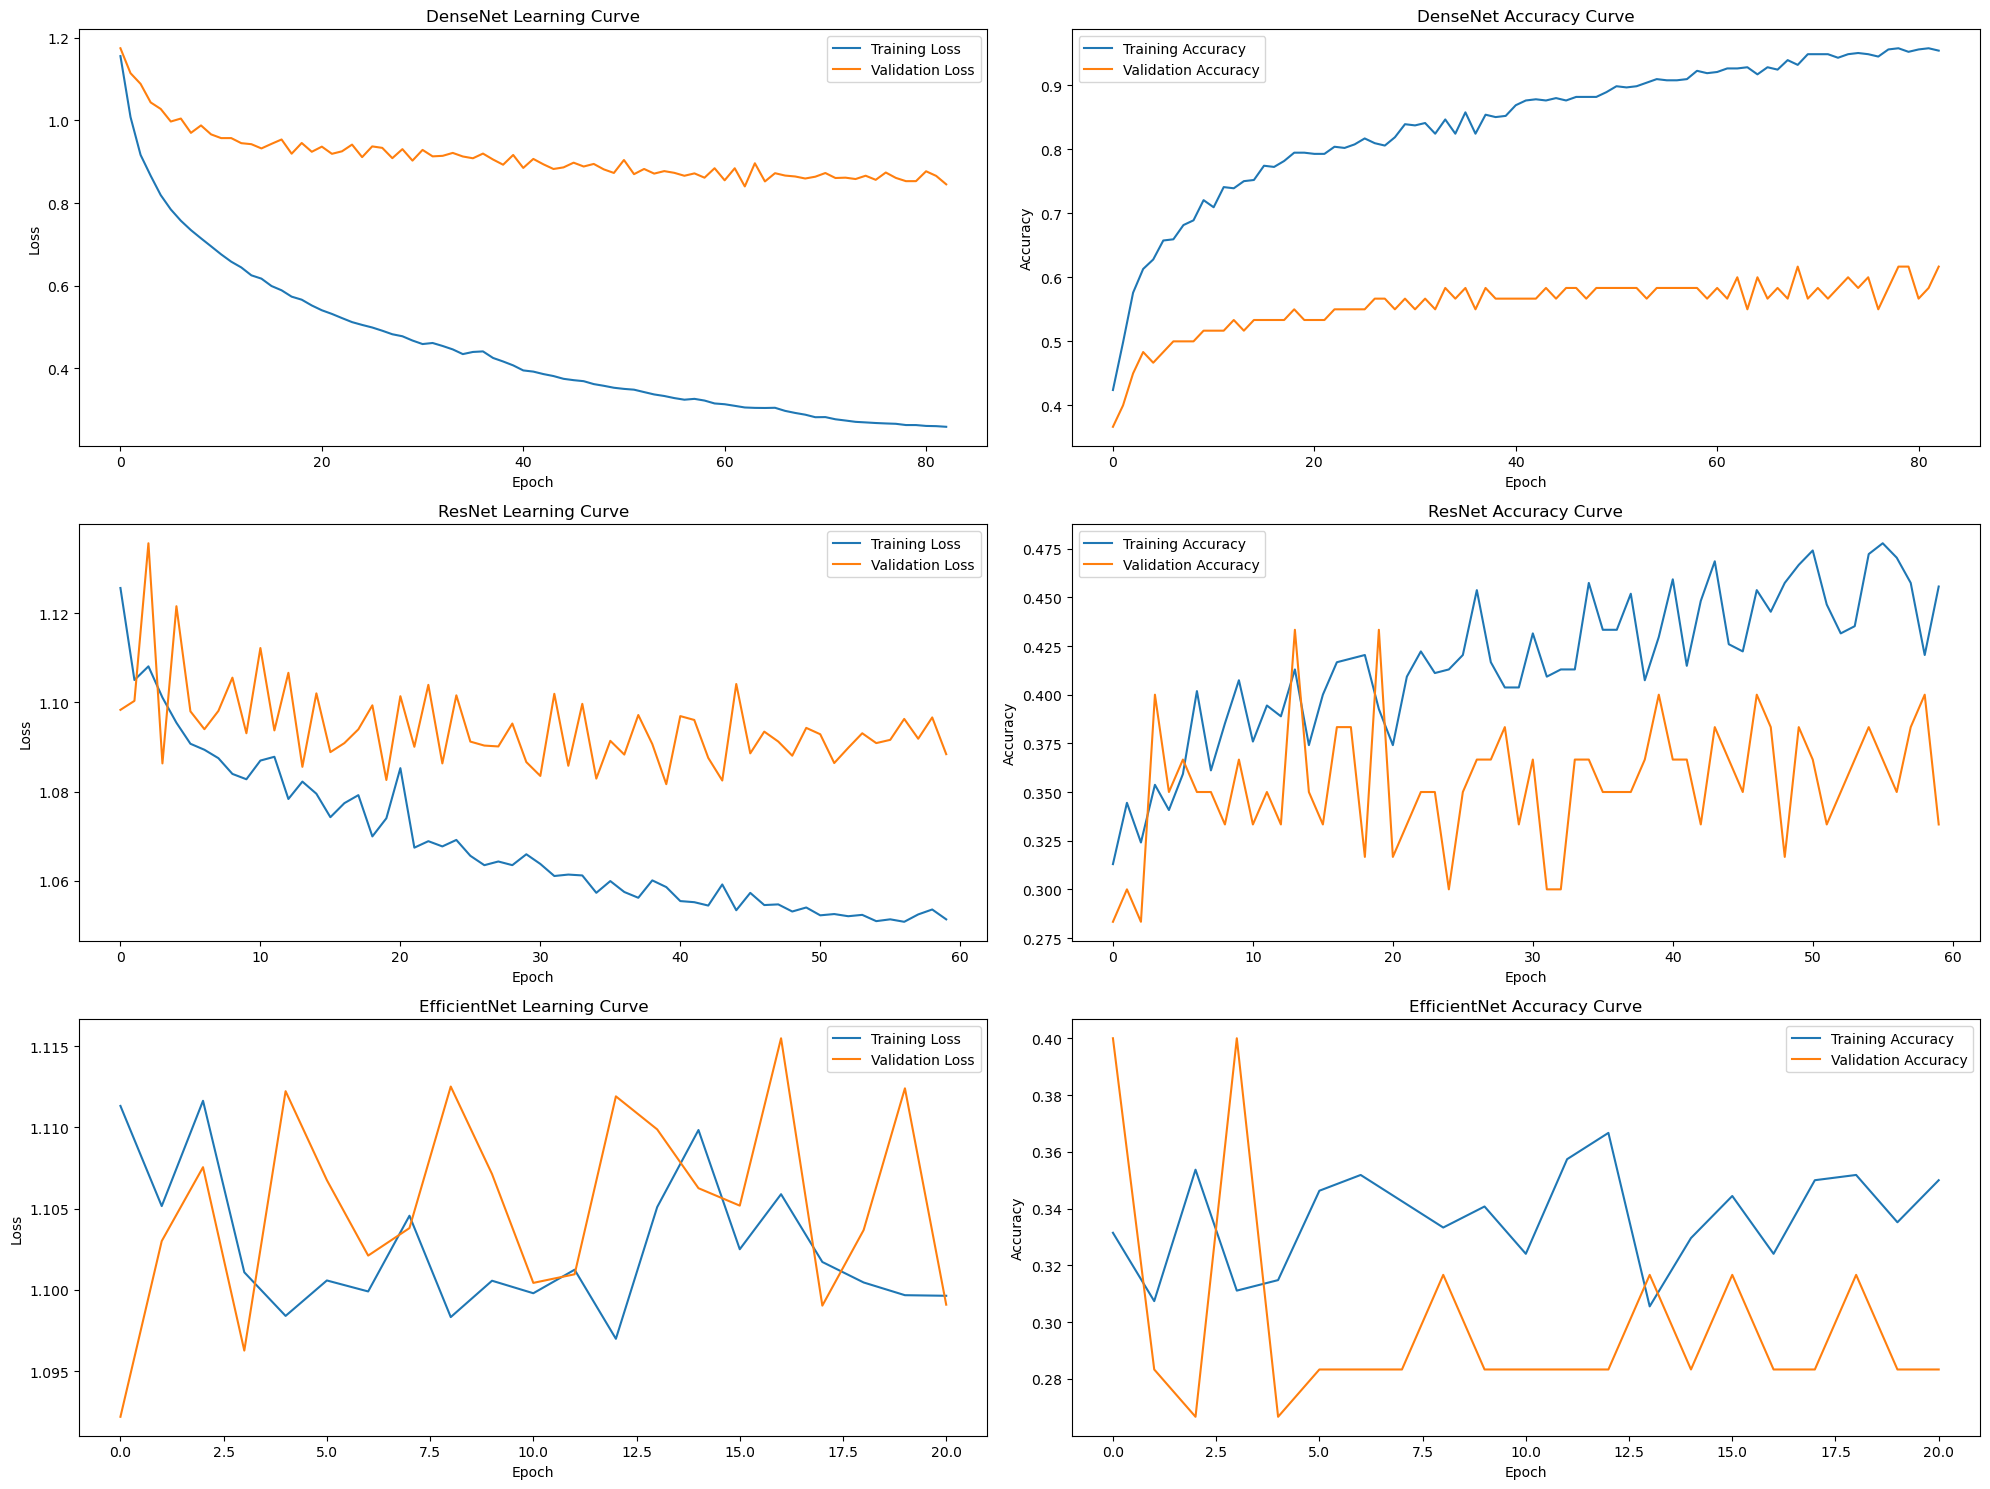

In [7]:
import matplotlib.pyplot as plt


def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()


def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()


fig, axs = plt.subplots(3, 2, figsize=(20, 15))
plot_learning_curves(densenet_history, 'DenseNet', axs[0, 0])
plot_accuracy_curves(densenet_history, 'DenseNet', axs[0, 1])

plot_learning_curves(resnet_history, 'ResNet', axs[1, 0])
plot_accuracy_curves(resnet_history, 'ResNet', axs[1, 1])

plot_learning_curves(efficientnet_history, 'EfficientNet', axs[2, 0])
plot_accuracy_curves(efficientnet_history, 'EfficientNet', axs[2, 1])

plt.tight_layout()
plt.show()
